# Titanic Survival Prediction



### Importing Necessary Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# To Suppress  warnings
import warnings
warnings.filterwarnings("ignore")

### Loading the Titanic dataset

In [2]:
titanic_data = pd.read_csv("Titanic-Dataset.csv")
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Exploring and understanding the dataset

In [3]:
titanic_data.shape

(891, 12)

In [4]:
titanic_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
titanic_data['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

In [6]:
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### Data preprocessing

In [7]:
titanic_data = titanic_data.drop(['Name', 'Ticket', 'Cabin'], axis=1) 
titanic_data = pd.get_dummies(titanic_data, columns=['Sex', 'Embarked'], drop_first=True)

In [8]:
titanic_data.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,1,0,3,22.0,1,0,7.2500,True,False,True
1,2,1,1,38.0,1,0,71.2833,False,False,False
2,3,1,3,26.0,0,0,7.9250,False,False,True
3,4,1,1,35.0,1,0,53.1000,False,False,True
4,5,0,3,35.0,0,0,8.0500,True,False,True


In [9]:
# Handling missing values

titanic_data['Age'].fillna(titanic_data['Age'].median(), inplace=True)
titanic_data['Fare'].fillna(titanic_data['Fare'].median(), inplace=True)
titanic_data['Embarked_Q'].fillna(titanic_data['Embarked_Q'].mode()[0], inplace=True)
titanic_data['Embarked_S'].fillna(titanic_data['Embarked_S'].mode()[0], inplace=True)

In [10]:
titanic_data.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,1,0,3,22.0,1,0,7.2500,True,False,True
1,2,1,1,38.0,1,0,71.2833,False,False,False
2,3,1,3,26.0,0,0,7.9250,False,False,True
3,4,1,1,35.0,1,0,53.1000,False,False,True
4,5,0,3,35.0,0,0,8.0500,True,False,True


### Data Visualization

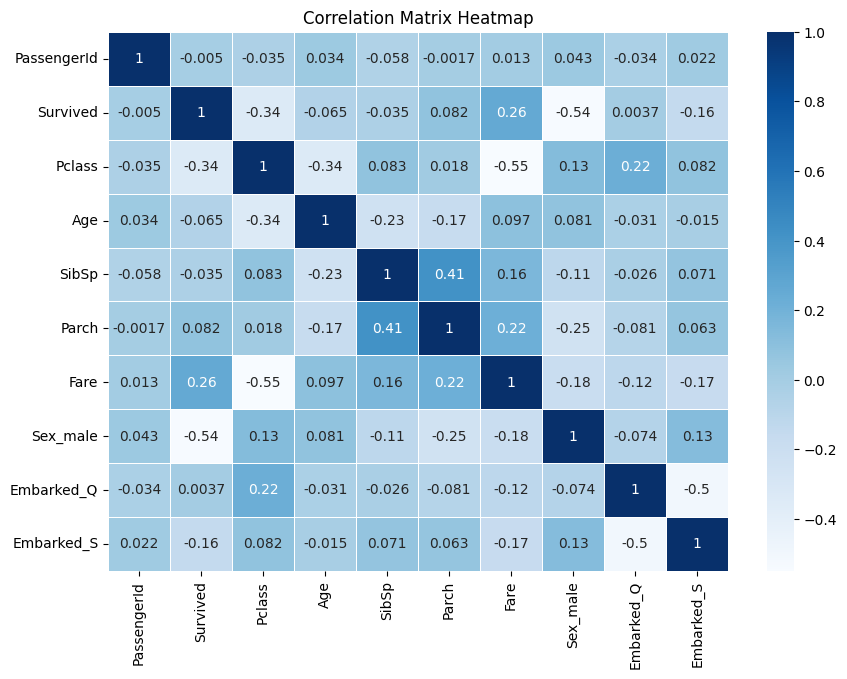

In [11]:
# Correlation Matrix Heatmap

correlation_matrix = titanic_data.corr()
plt.figure(figsize=(10, 7))
sns.heatmap(correlation_matrix, annot=True, cmap='Blues', linewidths=.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

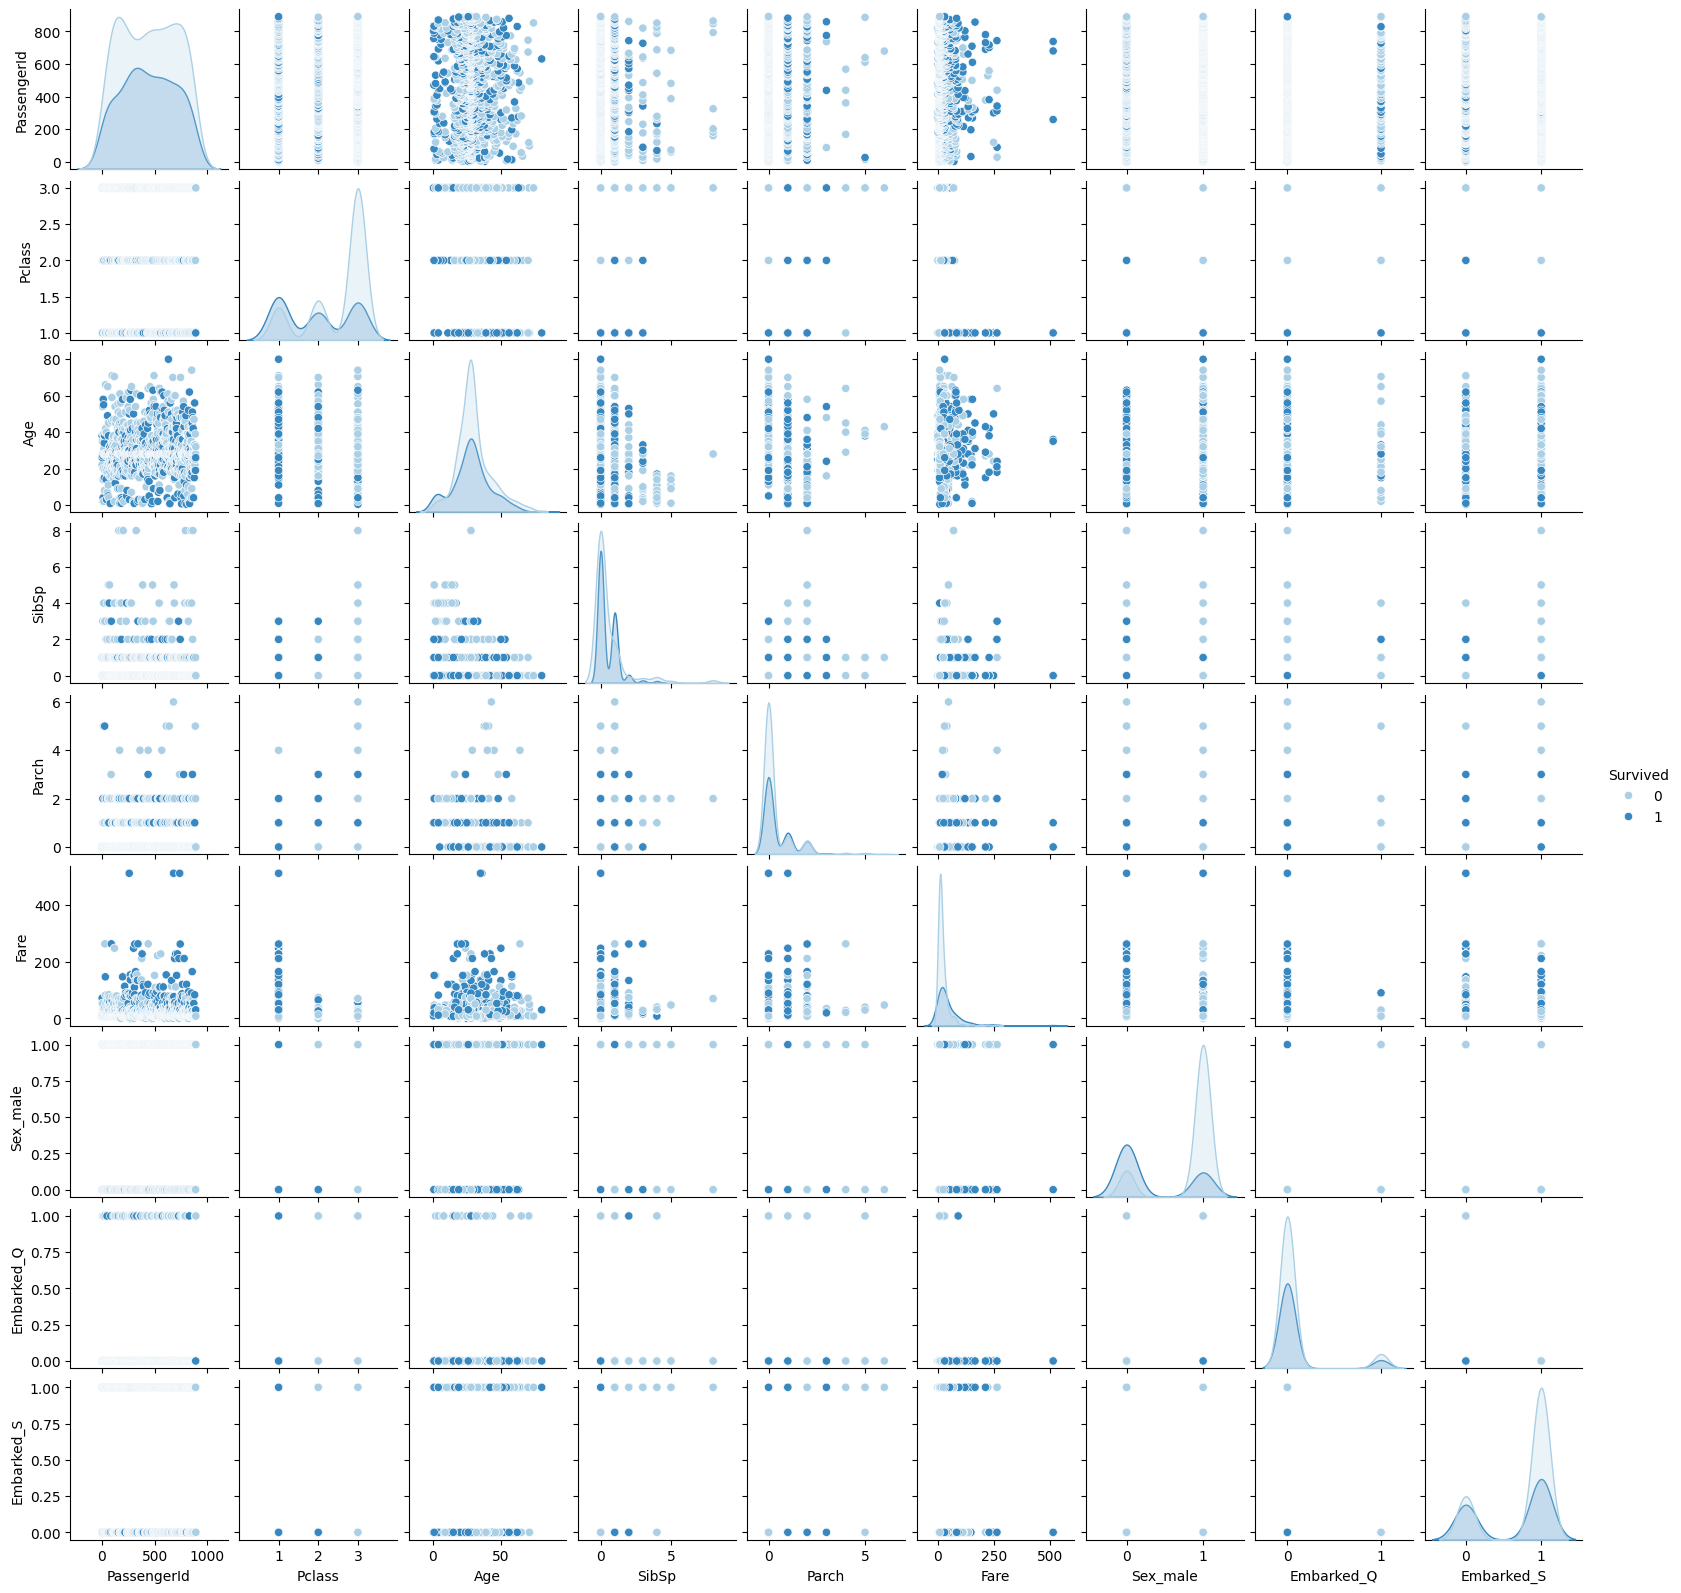

In [12]:
# Pair Plot

sns.pairplot(titanic_data, hue='Survived', palette="Blues", height=1.8)
plt.show()


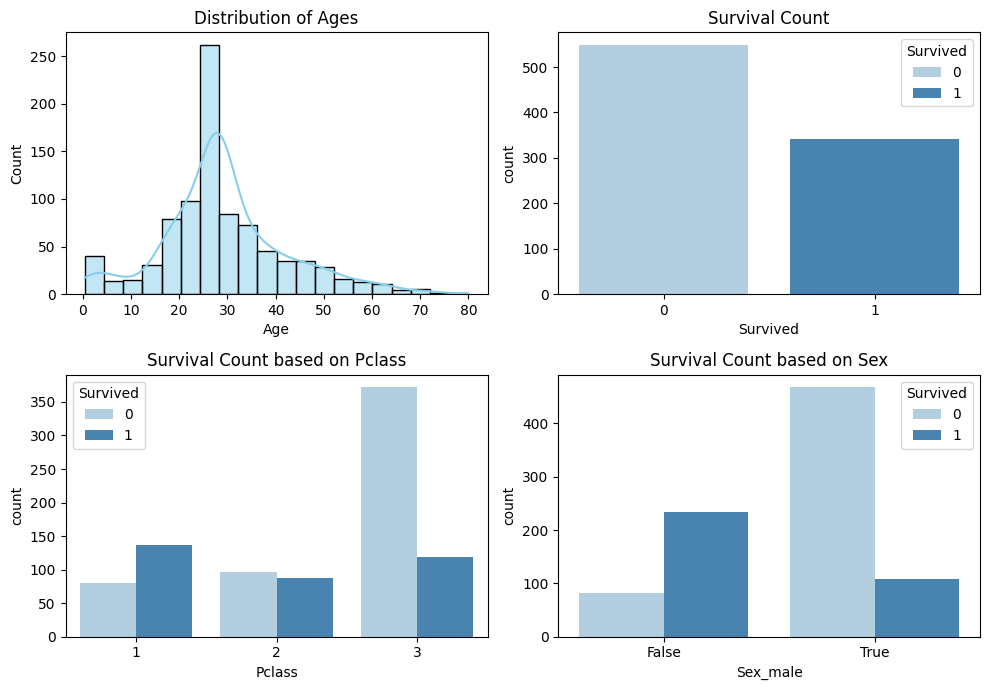

In [13]:
# Sub plots

plt.figure(figsize=(10, 7))

plt.subplot(2, 2, 1)
sns.histplot(titanic_data['Age'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Ages')

plt.subplot(2, 2, 2)
sns.countplot(x='Survived', hue='Survived', data=titanic_data, palette='Blues')
plt.title('Survival Count')

plt.subplot(2, 2, 3)
sns.countplot(x='Pclass', hue='Survived', data=titanic_data, palette='Blues')
plt.title('Survival Count based on Pclass')

plt.subplot(2, 2, 4)
sns.countplot(x='Sex_male', hue='Survived', data=titanic_data, palette='Blues')
plt.title('Survival Count based on Sex')

plt.tight_layout()
plt.show()

### Model Training

In [14]:
# Importing necessary libraries for model training

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [15]:
features = ['Pclass', 'Sex_male', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked_Q', 'Embarked_S']
X = titanic_data[features]
y = titanic_data['Survived']

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,  stratify=titanic_data['Survived'])

In [17]:
# Model Training and Comparison

# Random Forest
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)

# Gradient Boosting
gb_model = GradientBoostingClassifier()
gb_model.fit(X_train, y_train)  
y_pred_gb = gb_model.predict(X_test)
accuracy_gb = accuracy_score(y_test, y_pred_gb)

# Logistic Regression
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train) 
y_pred_lr = lr_model.predict(X_test)
accuracy_lr = accuracy_score(y_test, y_pred_lr)

print("\nModel Comparison Summary:")
model_comparison_summary = pd.DataFrame({
    'Model': ['Random Forest', 'Gradient Boosting', 'Logistic Regression'],
    'Accuracy': [accuracy_rf, accuracy_gb, accuracy_lr]
})
print(model_comparison_summary)


Model Comparison Summary:
                 Model  Accuracy
0        Random Forest  0.865922
1    Gradient Boosting  0.849162
2  Logistic Regression  0.854749



Random Forest Model Evaluation:
Random Forest Accuracy: 0.87

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.91      0.89       110
           1       0.85      0.80      0.82        69

    accuracy                           0.87       179
   macro avg       0.86      0.85      0.86       179
weighted avg       0.87      0.87      0.87       179


Confusion Matrix:


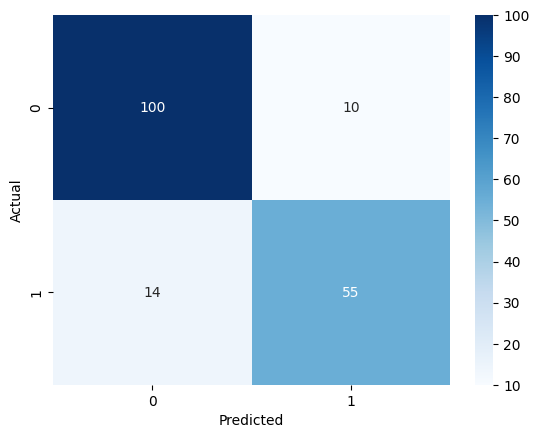

In [18]:
# Evaluating the Random Forest model

print("\nRandom Forest Model Evaluation:")
print(f"Random Forest Accuracy: {accuracy_rf:.2f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf))

print("\nConfusion Matrix:")
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [19]:
# Getting actual & predicted results for survival

predicted_results_rf = pd.DataFrame({ 'Actual': y_test, 'Predicted_RF': y_pred_rf})
predicted_results_rf

,Actual,Predicted_RF
682,0,0
644,1,1
378,0,1
56,1,1
745,0,0
...,...,...
482,0,0
614,0,0
757,0,0
193,1,1


### Predicting for given input

In [20]:
print("\nPredicted on User Input:")

user_input_data = {
    'Pclass': [1],
    'Sex_male': [0],
    'Age': [30],
    'SibSp': [1],
    'Parch': [0],
    'Fare': [20],
    'Embarked_Q': [0],
    'Embarked_S': [1]
}

user_input = pd.DataFrame(user_input_data)
print("\nUser Input Data:")
print(user_input)

# Prediction using Random Forest
user_prediction_rf = rf_model.predict(user_input)
print(f"\nRandom Forest Prediction for given Input: {user_prediction_rf[0]}")

# Prediction using Gradient Boosting
user_prediction_gb = gb_model.predict(user_input)
print(f"Gradient Boosting Prediction for given Input: {user_prediction_gb[0]}")

# Prediction using Logistic Regression
user_prediction_lr = lr_model.predict(user_input)
print(f"Logistic Regression Prediction for given Input: {user_prediction_lr[0]}")



Predicted on User Input:

User Input Data:
   Pclass  Sex_male  Age  SibSp  Parch  Fare  Embarked_Q  Embarked_S
0       1         0   30      1      0    20           0           1

Random Forest Prediction for given Input: 1
Gradient Boosting Prediction for given Input: 1
Logistic Regression Prediction for given Input: 1
